<a href="https://colab.research.google.com/github/kamini8888/Iris-Classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary:**
In this project, we will build a machine learning model to classify Iris flowers into three different species using the Iris dataset. The dataset includes measurements for sepal and petal length and width.

**Objective:** Develop a classification model to identify flower species based on these measurements.

**Key Steps:**

1. Load and preprocess the dataset.

2. Split the data into training and test sets.

3. Train a Random Forest classifier.

4. Evaluate the model performance using accuracy, classification report, and confusion matrix.

5. Identify the most significant features influencing the classification.

**Expected Outcome:** A trained machine learning model with high species identification accuracy, as well as insights into the features that influence the classification.



In [1]:
# Step 1: Import Libraries

# Import the necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 2: Load the Iris Dataset
url = "/content/IRIS (1).csv"
iris = pd.read_csv(url)

# Display first 5 rows to understand the structure of data
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Step 3: 3. Data Exploration

iris.info()

# Get statistical summary of the dataset
iris.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Step 4: Data Preprocessing

# Separate features (X) and target (y)
X = iris.drop("species", axis=1)  # Features: sepal length, width, petal length, width
y = iris["species"]  # Target: species

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale the features (important for models like SVM, Logistic Regression, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
#  Step 6:  Model Training

# Train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Step 7:  Make Predictions

# Make predictions using the trained model
y_pred = model.predict(X_test_scaled)


Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


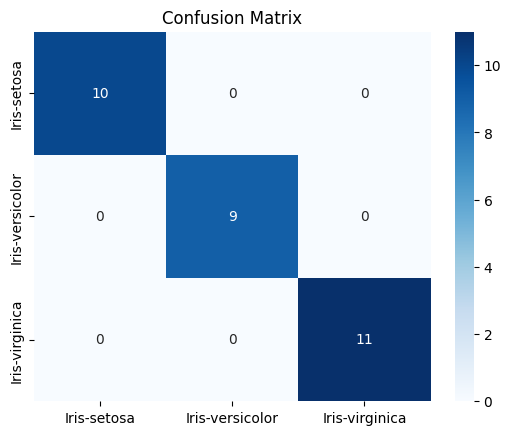

In [8]:
# Step 8: Model Evaluation

# Evaluate model performance: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report: precision, recall, and f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix: Visualizing the performance
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title("Confusion Matrix")
plt.show()


In [9]:
# Step 9: Feature Importance

# Identify the most significant features influencing the classification
importances = model.feature_importances_  # Feature importance scores
features = iris.columns[:-1]  # Feature names: excluding the target 'species' column

# Display feature importance for each feature
print("\nFeature Importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")



Feature Importances:
sepal_length: 0.1081
sepal_width: 0.0304
petal_length: 0.4400
petal_width: 0.4215


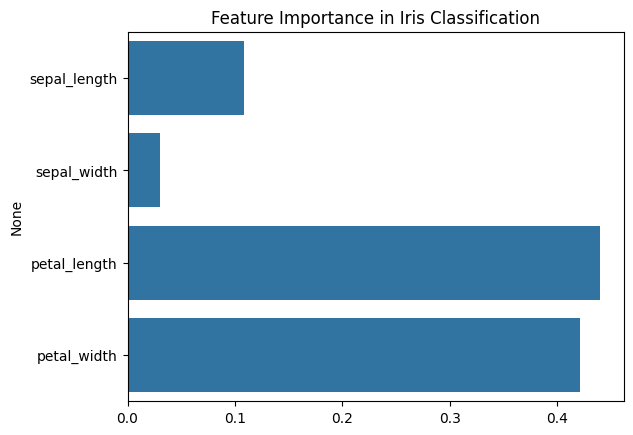

In [10]:
# Step 10: Visualize Feature Importance

# Visualize the feature importance using a bar plot
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Iris Classification")
plt.show()


# **Expected Outcome:**
A trained Random Forest Classifier that can predict the species of Iris flowers based on their measurements (sepal and petal lengths and widths).

Evaluation with a high accuracy score, a classification report, and a confusion matrix that shows how well the model performs.

Feature importance analysis to identify the key features that influence the model’s predictions.